# 查看数据集是否被正确生成

In [1]:
import os
from PIL import Image
import skimage.draw as draw
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_path = r"..\data\WatermarkDataset\images\n01440764_1775.jpg"
label_path = r"..\data\WatermarkDataset\labels\n01440764_1775.txt"

In [3]:
img = Image.open(image_path)
label_boxes = []
with open(label_path, encoding='utf-8') as f:
    for line in f.readlines():
        if line == "\n":
            continue
        label_boxes.append([float(i) for i in line.split(' ')[1:]])

In [4]:
img, label_boxes

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=418x500>,
 [[0.2894736842105263, 0.733, 0.3827751196172249, 0.202],
  [0.5885167464114832, 0.229, 0.3827751196172249, 0.202],
  [0.7607655502392344, 0.567, 0.3827751196172249, 0.202]])

In [5]:
width, height = img.size
print(width, height)

418 500


In [6]:
img_np = np.array(img)
for point in label_boxes:
    p = [0, 0, 0, 0]
    p[0] = point[0] * width
    p[1] = point[1] * height
    p[2] = point[2] * width
    p[3] = point[3] * height
    start_point = [int(p[0]-p[2]/2), int(p[1]-p[3]/2)]
    end_point = [int(p[0]+p[2]/2), int(p[1]+p[3]/2)]
    
    rr, cc = draw.rectangle_perimeter(start_point, end=end_point, shape=img.size)
    #rr, cc = draw.rectangle(start_point, end=end_point, shape=img.size)
    img_np[cc, rr] = (0, 255, 255)
new_img = Image.fromarray(img_np)

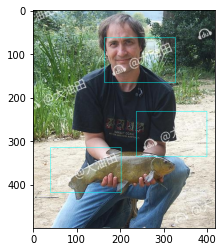

In [7]:
plt.imshow(new_img)

# 数据集可视化图片制作